In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/jojomac/introduction_python/dataset/housing.csv')

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Step 1 : Know Your Dataset

<b>The data pertains to the houses found in a given California district and some summary stats about them based on the 1990 census data.<b>


longitude : Garis Bujur

latitude : Garis Lintang

housing_median_age: median umur per rumah 

total_rooms : total ruangan

total_bedrooms : total kamar
    
population : populasi
    
households : total rumah tangga 

median_income : median pendapatan rumah tangga di blok (unit: ribuan dolar).
    
median_house_value : median_harga_rumah

ocean_proximity: jarak ke lautan

### Step 2 : Buat Pertanyaan 

1. Faktor apa yang mempengaruhi harga rumah
2. Bagaimana pengaruh jauh dekat akses ke pantai terhadap banyaknya populasi
3. Berapa rata rata usia yang menginap di perumahan tersebut
4. Apakah jumlah kamar dan jumlah ruangan mempengaruhi harga rumah

### Step 3 : Preprocessing 

#### 3.1 Data Cleaning

In [ ]:
df.info()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
# Mengecek berapa jumlah null value pada masing masing kolom. 
jumlah_missing = pd.isnull(df).sum()
jumlah_missing

In [5]:
jumlah_missing = pd.isnull(df).sum()
jumlah_missing

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [ ]:
# menghitung ratio missing value pada metrics cabin
rasio = jumlah_missing.div(len(df))
rasio

In [6]:
rasio = jumlah_missing.div(len(df))
rasio

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        0.010029
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64

In [7]:
df['total_rooms']

0         880.0
1        7099.0
2        1467.0
3        1274.0
4        1627.0
          ...  
20635    1665.0
20636     697.0
20637    2254.0
20638    1860.0
20639    2785.0
Name: total_rooms, Length: 20640, dtype: float64

In [8]:
df['total_bedrooms'].mean()

537.8705525375618

In [9]:
int(df['total_bedrooms'].mean())

537

In [ ]:
df['total_bedrooms'].fillna(int(df['total_rooms'].mean()), inplace=True)

In [11]:
df['total_bedrooms'].fillna(int(df['total_bedrooms'].mean()), inplace=True)

In [12]:
# Cek kembali apakah masih terdapat missing value
pd.isnull(df).sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

#### 3.2 Feature Engineering

In [ ]:
df['total_rooms_bedroom'] = df['total_rooms'] + df['total_bedrooms'] 

In [13]:
df['total_rooms_bedroom'] = df['total_rooms'] + df['total_bedrooms']

In [14]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,total_rooms_bedroom
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,1009.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,8205.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,1657.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,1509.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,1907.0


In [ ]:
df.head()

### Step 4 : Analysis and visualization

#### 3.1 Analysis median income 

In [ ]:
df['median_income'].describe()

In [15]:
df['median_income'].describe()

count    20640.000000
mean         3.870671
std          1.899822
min          0.499900
25%          2.563400
50%          3.534800
75%          4.743250
max         15.000100
Name: median_income, dtype: float64

In [ ]:
plt.hist(df['median_income'], bins=20, edgecolor='black')
plt.title('Histogram of Median Income')
plt.xlabel('Median Income dalam ribuan dollar')
plt.ylabel('Frequency')
plt.grid(True)

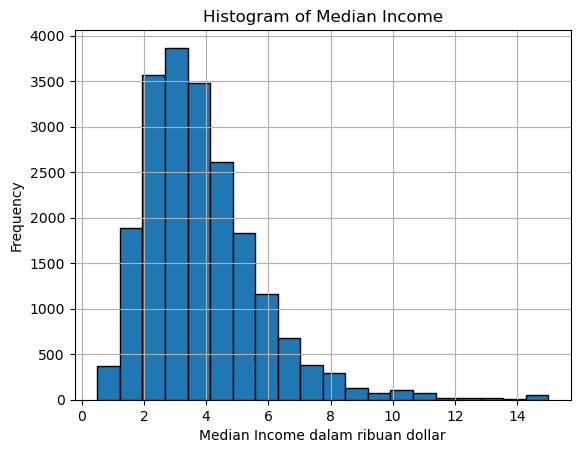

In [16]:
plt.hist(df['median_income'], bins=20, edgecolor = 'black')
plt.title('Histogram of Median Income')
plt.xlabel('Median Income dalam ribuan dollar')
plt.ylabel('Frequency')
plt.grid(True)

#### 3.2 Analysis median house value

In [17]:
df['median_house_value'].describe()

count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
Name: median_house_value, dtype: float64

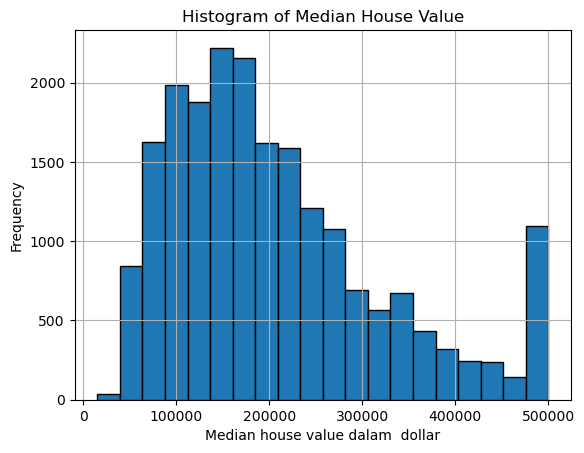

In [18]:
plt.hist(df['median_house_value'], bins=20, edgecolor='black')
plt.title('Histogram of Median House Value')
plt.xlabel('Median house value dalam  dollar')
plt.ylabel('Frequency')
plt.grid(True)

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [19]:
correlation_matrix = df.corr()

/var/folders/5j/v_4hb3zs0cvf0rqvnnvj0fsw0000gp/T/ipykernel_2930/4214245630.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


In [21]:
correlation_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,total_rooms_bedroom
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069259,0.099773,0.055310,-0.015176,-0.045967,0.049033
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066657,-0.108785,-0.071035,-0.079809,-0.144160,-0.041435
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.318999,-0.296244,-0.302916,-0.119034,0.105623,-0.357988
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.927253,0.857126,0.918484,0.198050,0.134153,0.998140
total_bedrooms,0.069259,-0.066657,-0.318999,0.927253,1.000000,0.873909,0.974724,-0.007681,0.049454,0.948355
population,0.099773,-0.108785,-0.296244,0.857126,0.873909,1.000000,0.907222,0.004834,-0.024650,0.868416
households,0.055310,-0.071035,-0.302916,0.918484,0.974724,0.907222,1.000000,0.013033,0.065843,0.936811
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007681,0.004834,0.013033,1.000000,0.688075,0.166532
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049454,-0.024650,0.065843,0.688075,1.000000,0.121702
total_rooms_bedroom,0.049033,-0.041435,-0.357988,0.998140,0.948355,0.868416,0.936811,0.166532,0.121702,1.000000


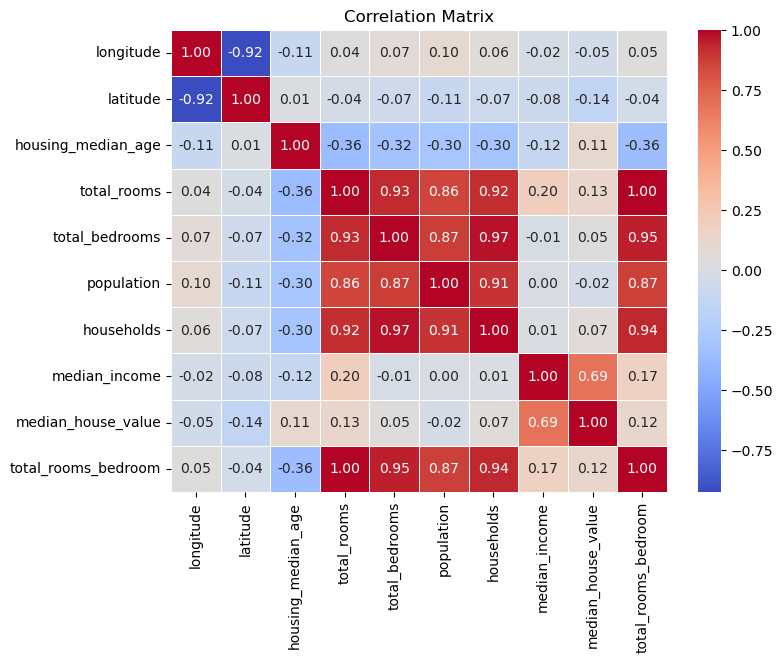

In [22]:
plt.figure(figsize = (8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidth=0.5, fmt = '.2f')
plt.title('Correlation Matrix')
plt.show()

#### 3.3 Analysis Ocean Proximity

In [ ]:

plt.figure(figsize=(6, 4))
sns.countplot(x='ocean_proximity', data=df)
plt.title('ocean proximity')
plt.show()


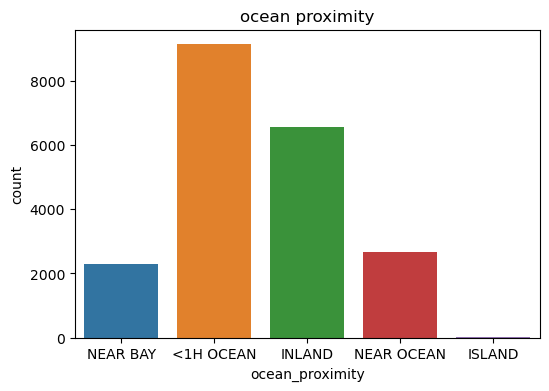

In [23]:
plt.figure(figsize = (6,4))
sns.countplot(x='ocean_proximity', data = df)
plt.title('ocean proximity')
plt.show()

#### 3.4 Analysis Age 

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['housing_median_age'].dropna(), bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


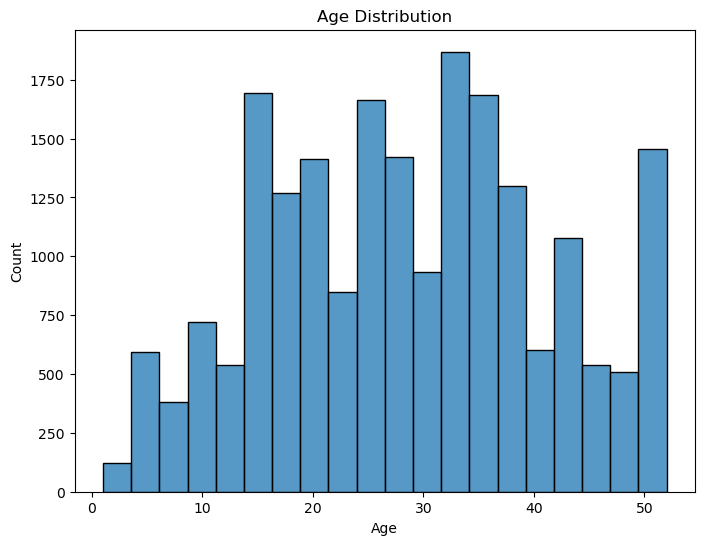

In [24]:
plt.figure(figsize = (8,6))
sns.histplot(df['housing_median_age'], bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

#### 3.5 Analysis Households

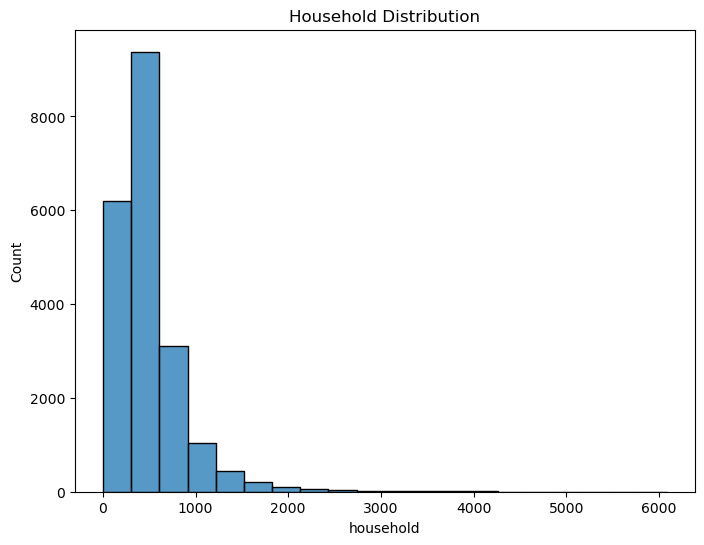

In [25]:

plt.figure(figsize=(8, 6))
sns.histplot(df['households'], bins=20)
plt.title('Household Distribution')
plt.xlabel('household')
plt.ylabel('Count')
plt.show()


In [26]:
population_by_ocean_proximity = df.groupby('ocean_proximity')['population'].sum()
population_by_ocean_proximity

ocean_proximity
<1H OCEAN     13889374.0
INLAND         9112744.0
ISLAND            3340.0
NEAR BAY       2817427.0
NEAR OCEAN     3598955.0
Name: population, dtype: float64

In [27]:
population_by_ocean_proximity = df.groupby('ocean_proximity')['population'].sum()/df['population'].sum()
population_by_ocean_proximity

ocean_proximity
<1H OCEAN     0.472077
INLAND        0.309727
ISLAND        0.000114
NEAR BAY      0.095760
NEAR OCEAN    0.122323
Name: population, dtype: float64

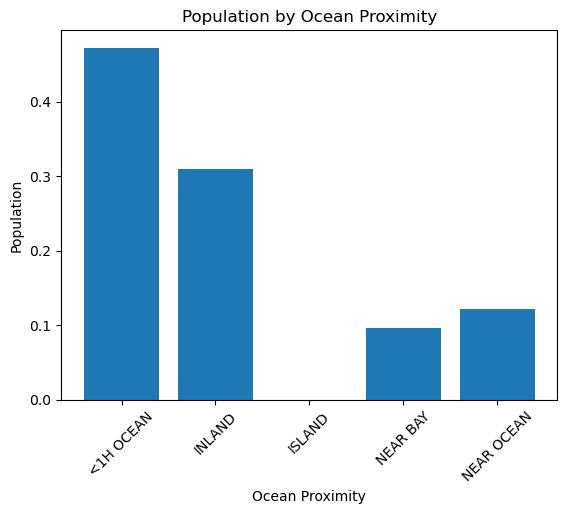

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'housing_df' is your DataFrame containing the 'ocean_proximity' and 'Population' columns
# Group by 'ocean_proximity' and calculate the sum of 'Population' for each category


# Create a bar plot
plt.bar(population_by_ocean_proximity.index, population_by_ocean_proximity.values)
plt.title('Population by Ocean Proximity')
plt.xlabel('Ocean Proximity')
plt.ylabel('Population')
plt.xticks(rotation=45)

# Display the plot
plt.show()


In [ ]:
plt.scatter(df['total_rooms_bedroom'], df['median_house_value'])

# Customize the plot
plt.title('Scatter Plot: Total Rooms vs. Median House Value')
plt.xlabel('Total Room Bedroom')
plt.ylabel('Median House Value')
plt.grid(True)

# Display the plot
plt.show()

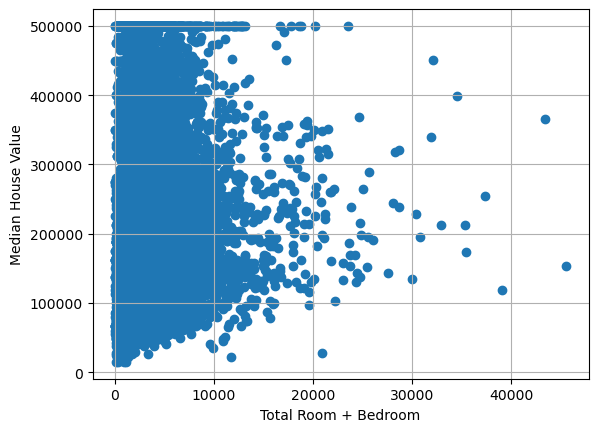

In [29]:
plt.scatter(df['total_rooms_bedroom'], df['median_house_value'])
plt.xlabel('Total Room + Bedroom')
plt.ylabel('Median House Value')
plt.grid(True)

plt.show()

/var/folders/5j/v_4hb3zs0cvf0rqvnnvj0fsw0000gp/T/ipykernel_2930/719300081.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


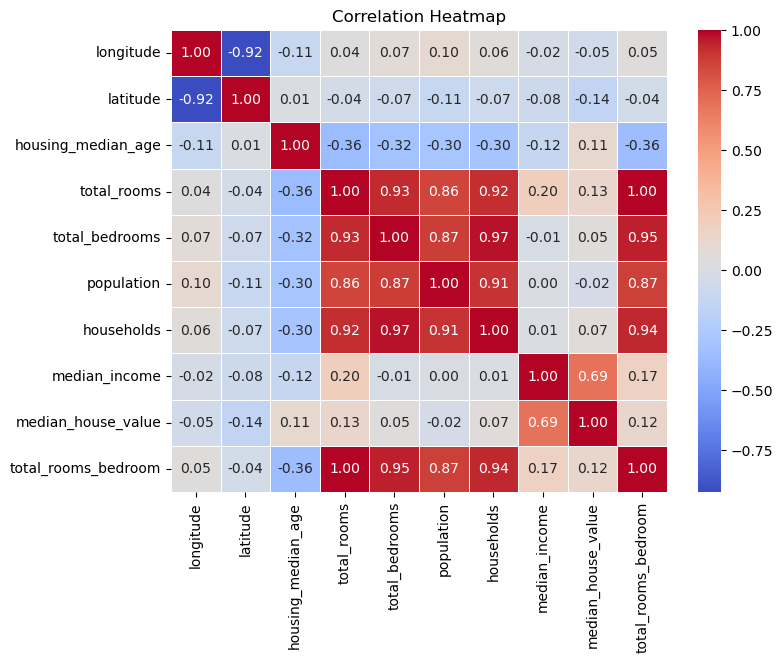

In [30]:
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


### 4. Kesimpulan 

1. Median income berbanding lurus dengan median house price
2. Cluster perumahan yang memiliki akses kurang dari 1 jam ke laut sangat tinggi
3. Usia penginap yang tinggal di perumahan tersebut di dominasi usia 32-35 tahun
4. Akses menuju pantai berbanding lurus dengan total populasi di perumahan tersebut ( < 1 jam)
5. Sebaran total bedroom tidak berbaris lurus dengan median house value